Spearman rho: 0.47241127047849657
p-value: 5.599442715349821e-09


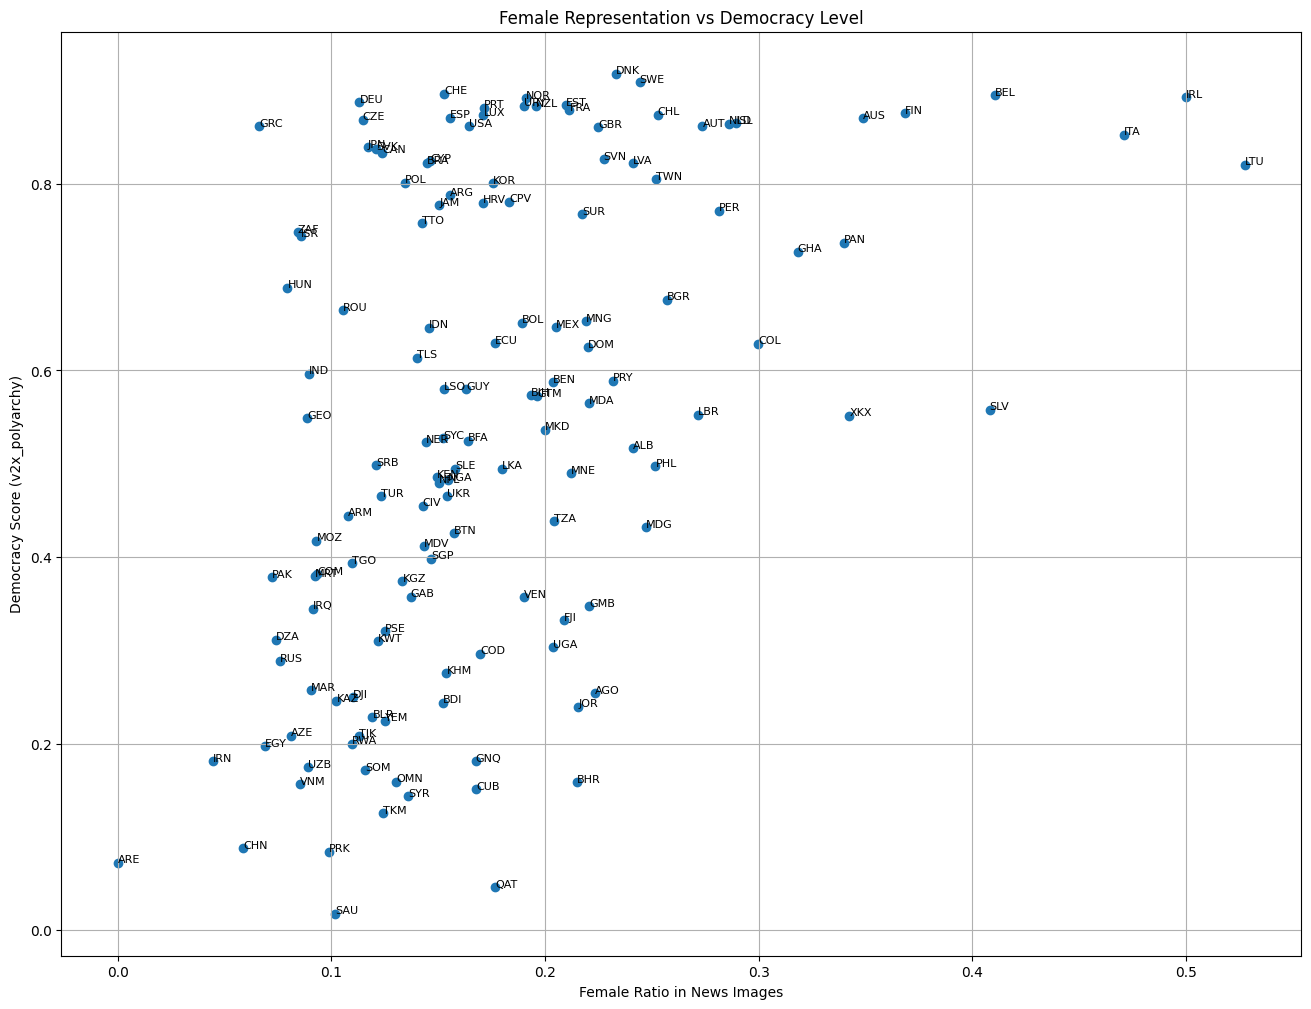

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

merged = pd.read_csv("/content/merged_list.csv")

merged_cleaned = merged.dropna(subset=["female_ratio", "v2x_polyarchy"])
cleaned_rows = merged_cleaned.shape[0]

# Spearman test
rho, pval = spearmanr(merged_cleaned["female_ratio"], merged_cleaned["v2x_polyarchy"])
print("Spearman rho:", rho)
print("p-value:", pval)

#visualising
plt.figure(figsize=(16,12))
plt.scatter(merged_cleaned["female_ratio"], merged_cleaned["v2x_polyarchy"])

for i, row in merged_cleaned.iterrows():
    plt.text(row["female_ratio"], row["v2x_polyarchy"], row["country"], fontsize=8)

plt.xlabel("Female Ratio in News Images")
plt.ylabel("Democracy Score (v2x_polyarchy)")
plt.title("Female Representation vs Democracy Level")
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import spearmanr

print("==== STEP 1: Veri yükleniyor ====")
merged = pd.read_csv("/content/merged_list.csv")
print("Merged shape:", merged.shape)
print()

# --- STEP 2: NaN temizliği ---
print("==== STEP 2: NaN temizliği ====")
merged_cleaned = merged.dropna(subset=["female_ratio", "v2x_polyarchy"])
print("Cleaned shape:", merged_cleaned.shape)
print("Kaç satır silindi:", merged.shape[0] - merged_cleaned.shape[0])
print()

# --- STEP 3: Data type kontrolü ---
print("==== STEP 3: Dtype kontrol ====")
print("female_ratio dtype:", merged_cleaned["female_ratio"].dtype)
print("v2x_polyarchy dtype:", merged_cleaned["v2x_polyarchy"].dtype)

# Eğer numeric değilse düzeltelim:
converted = False
if merged_cleaned["female_ratio"].dtype == "object":
    merged_cleaned["female_ratio"] = merged_cleaned["female_ratio"].astype(float)
    converted = True
if merged_cleaned["v2x_polyarchy"].dtype == "object":
    merged_cleaned["v2x_polyarchy"] = merged_cleaned["v2x_polyarchy"].astype(float)
    converted = True

if converted:
    print("⚠️  String → numeric dönüşümü yapıldı.")
else:
    print("Dtype'lar zaten numeric.")
print()

# --- STEP 4: Sıralı DataFrame oluştur ---
print("==== STEP 4: Sorting check ====")
df_sorted = merged_cleaned.sort_values(by="v2x_polyarchy")
print("Sorted shape:", df_sorted.shape)
print()

# --- STEP 5: Spearman karşılaştırma ---
print("==== STEP 5: Spearman karşılaştırması ====")

rho1, p1 = spearmanr(
    merged_cleaned["female_ratio"],
    merged_cleaned["v2x_polyarchy"]
)

rho2, p2 = spearmanr(
    df_sorted["female_ratio"],
    df_sorted["v2x_polyarchy"]
)

print("Spearman (cleaned DF):")
print("rho =", rho1, "| p =", p1)
print()

print("Spearman (sorted DF):")
print("rho =", rho2, "| p =", p2)
print()

# --- STEP 6: Sonuç analizi ---
print("==== STEP 6: Analiz ====")

if merged_cleaned.shape[0] != df_sorted.shape[0]:
    print("❌ Satır sayısı farklı! Bu yüzden Spearman farklı çıkıyor olabilir.")
else:
    print("✔ Satır sayısı aynı.")

if (rho1 != rho2) or (p1 != p2):
    print("⚠️ Spearman değerleri farklı çıkıyor.")
    print("Olası nedenler:")
    print("- DataFrame’e farklı sırada veri girmiş olman (sorting normalde etkilemez)")
    print("- Bir yerde ekstra drop/filter yapılmış olması")
    print("- NaN temizliği iki aşamada farklı sonuç vermiş olabilir")
else:
    print("✔ Spearman değerleri aynı. Sorun yok.")


==== STEP 1: Veri yükleniyor ====
Merged shape: (143, 4)

==== STEP 2: NaN temizliği ====
Cleaned shape: (137, 4)
Kaç satır silindi: 6

==== STEP 3: Dtype kontrol ====
female_ratio dtype: float64
v2x_polyarchy dtype: float64
Dtype'lar zaten numeric.

==== STEP 4: Sorting check ====
Sorted shape: (137, 4)

==== STEP 5: Spearman karşılaştırması ====
Spearman (cleaned DF):
rho = 0.47241127047849657 | p = 5.599442715349821e-09

Spearman (sorted DF):
rho = 0.47241127047849657 | p = 5.599442715349821e-09

==== STEP 6: Analiz ====
✔ Satır sayısı aynı.
✔ Spearman değerleri aynı. Sorun yok.


In [ ]:
import pandas as pd
from scipy.stats import spearmanr

# Veriyi yükle
merged = pd.read_csv("/content/merged_list.csv")

# NaN temizliği
merged_cleaned = merged.dropna(subset=["female_ratio", "v2x_polyarchy"])

# Spearman testi
rho, pval = spearmanr(
    merged_cleaned["female_ratio"],
    merged_cleaned["v2x_polyarchy"]
)

# --- Hipotezleri yazdır ---
print("=== Hypothesis Definitions ===")
print("H0: rho = 0  (No association between democracy level and female representation)")
print("H1: rho > 0  (Higher democracy → higher female representation)")
print()

# --- Sonuçları yazdır ---
print("=== Spearman Test Results ===")
print(f"Spearman's rho: {rho:.4f}")
print(f"p-value: {pval:.6f}")
print()

# --- Otomatik yorumlama ---
print("=== Interpretation ===")
if pval < 0.05:
    print("p-value < 0.05 → Reject H0.")
    print("There is a *statistically significant positive association* between democracy level and female representation.")
    if rho > 0:
        print(f"The association is positive (rho = {rho:.3f}).")
    else:
        print(f"However rho = {rho:.3f}, which is not positive.")
else:
    print("p-value ≥ 0.05 → Fail to reject H0.")
    print("There is *no statistically significant evidence* of a positive association.")


=== Hypothesis Definitions ===
H0: rho = 0  (No association between democracy level and female representation)
H1: rho > 0  (Higher democracy → higher female representation)

=== Spearman Test Results ===
Spearman's rho: 0.4724
p-value: 0.000000

=== Interpretation ===
p-value < 0.05 → Reject H0.
There is a *statistically significant positive association* between democracy level and female representation.
The association is positive (rho = 0.472).


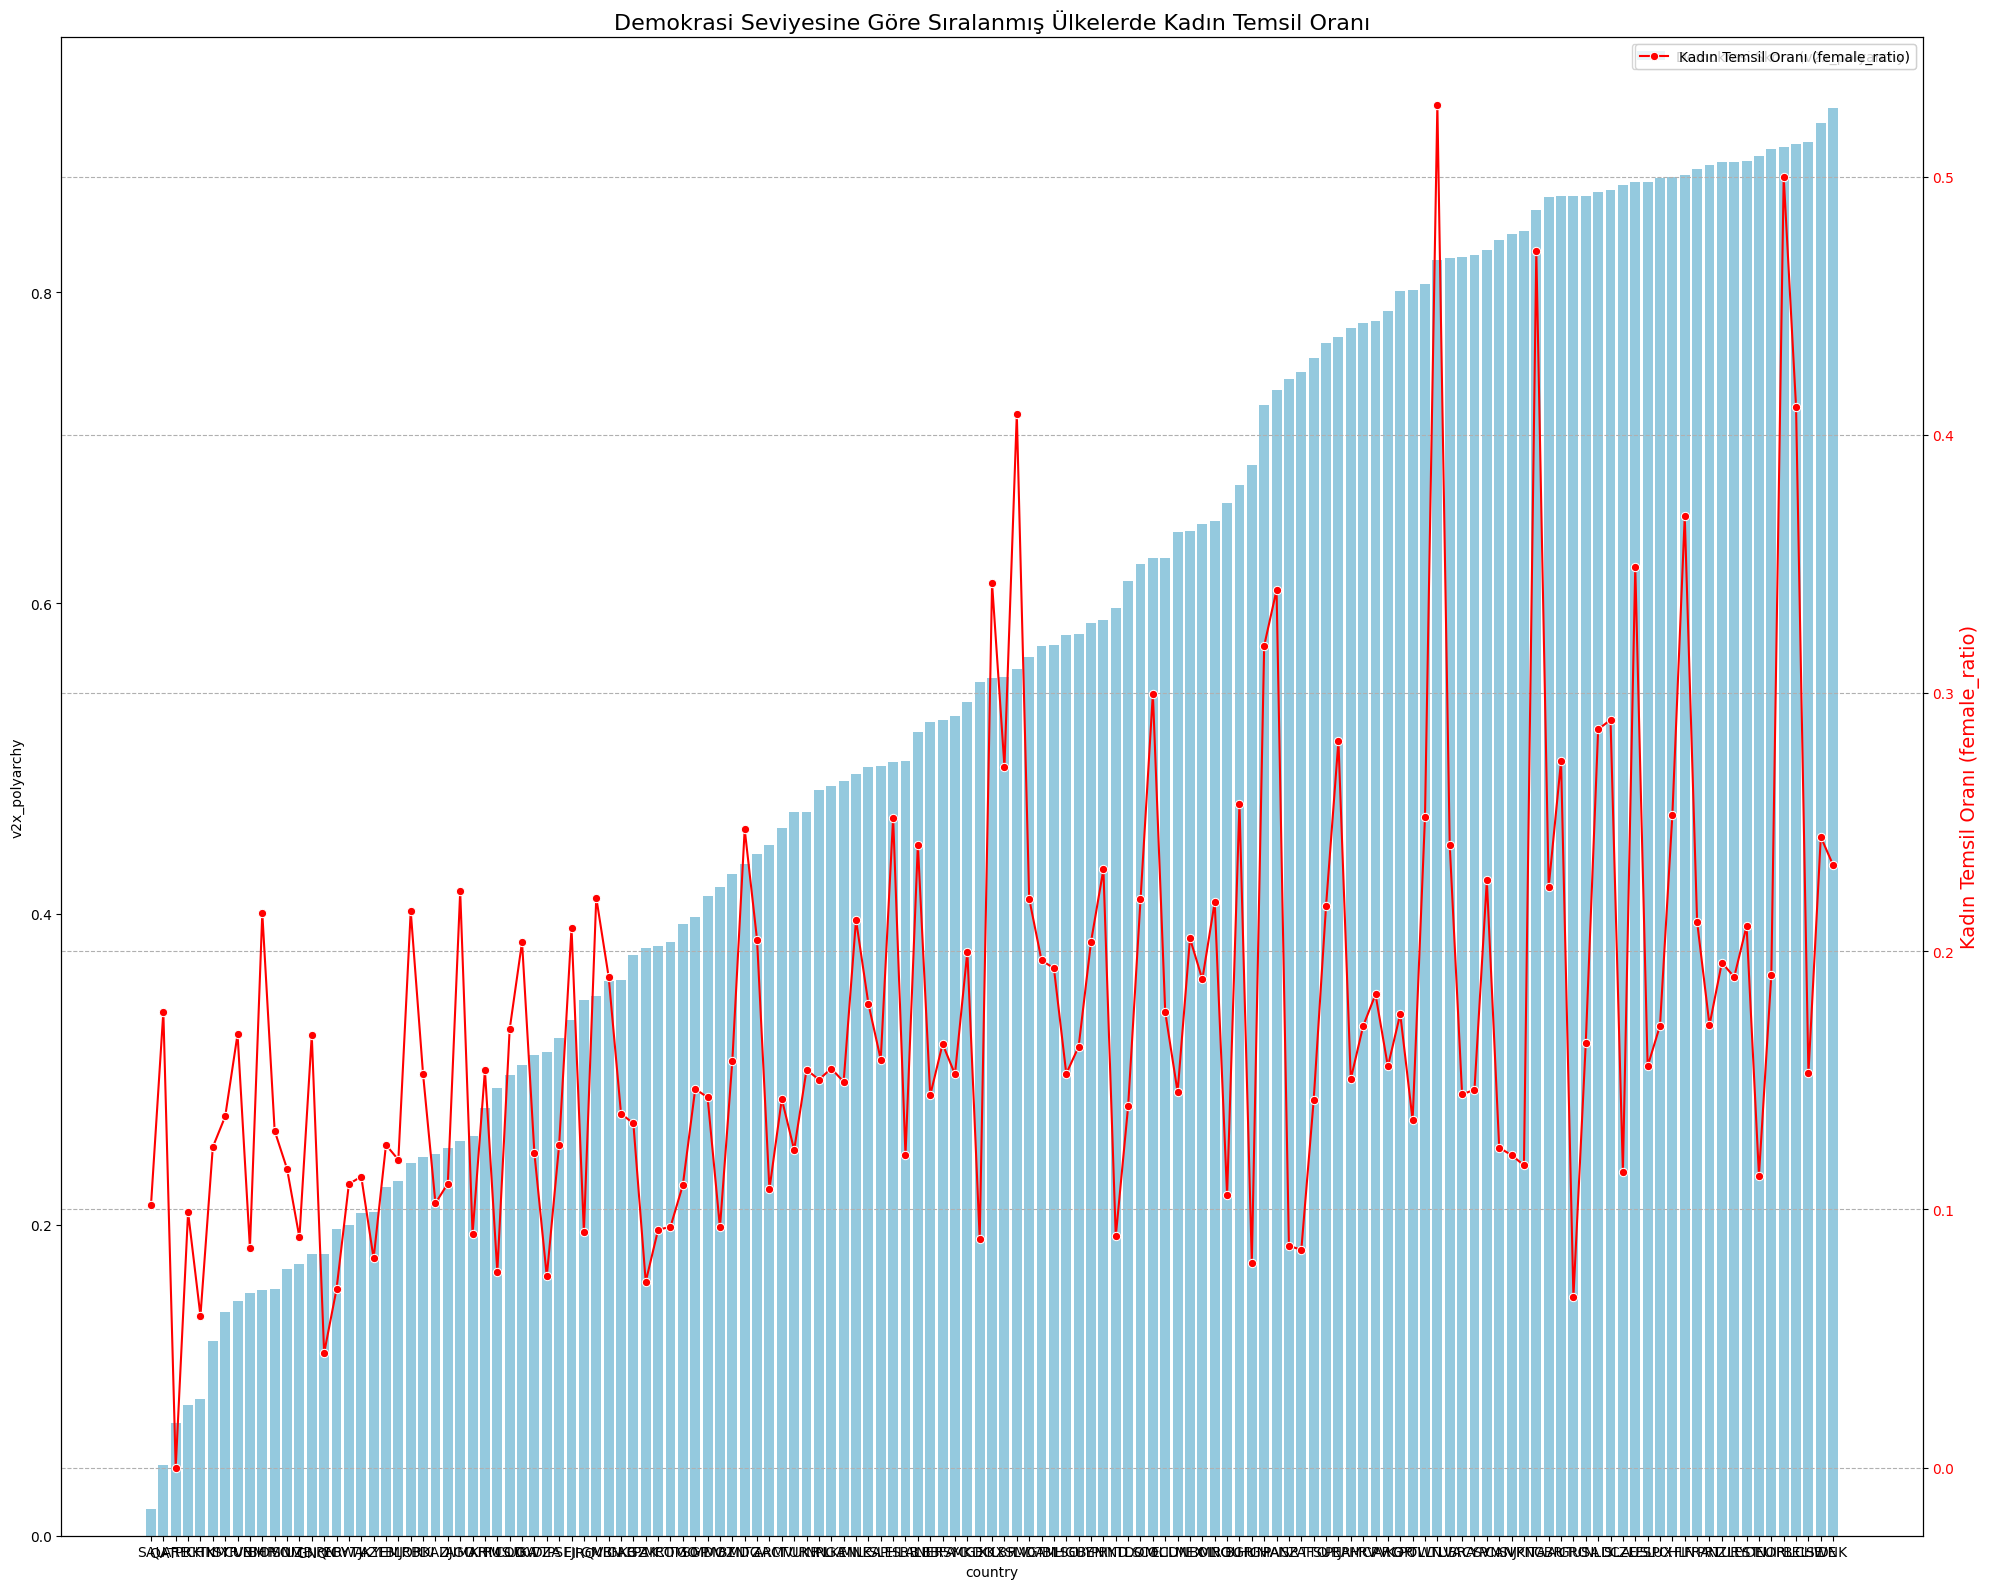

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Daha önce temizlediğiniz DataFrame'i kullanıyoruz: merged_cleaned
# Eğer bu DataFrame tanımlı değilse, önceki adımları çalıştırmanız gerekir.

# --- 1. Veriyi Demokrasi Skoruna göre Sıralama ---
# Ülkeleri Demokrasi Skoruna göre küçükten büyüğe sıralıyoruz.
# Bu, grafikte daha iyi bir görsel akış sağlayacaktır.
df_sorted = merged_cleaned.sort_values(by='v2x_polyarchy', ascending=True)

# --- 2. Görselleştirme ---
plt.figure(figsize=(20, 16)) # Geniş bir grafik boyutu seçtik

# Çubuk Grafiği (Bar Plot) ile ülkelerin Demokrasi Skorlarını gösterme
# Y ekseninde ülkenin kendisi (country), X ekseninde ise skor var.
sns.barplot(x='country', y='v2x_polyarchy', data=df_sorted, color='skyblue', label='Demokrasi Skoru (v2x_polyarchy)')

# İkinci bir eksen ekleyerek Kadın Temsil Oranını (female_ratio) çizme
# Bu, iki farklı değişkeni (skor ve oran) tek grafikte karşılaştırmayı sağlar.
ax2 = plt.twinx()
sns.lineplot(x='country', y='female_ratio', data=df_sorted, ax=ax2, color='red', marker='o', label='Kadın Temsil Oranı (female_ratio)')

# --- 3. Etiket ve Başlıklar ---
plt.title('Demokrasi Seviyesine Göre Sıralanmış Ülkelerde Kadın Temsil Oranı', fontsize=16)
plt.xlabel('Ülkeler (Demokrasi Skoruna Göre Artan)', fontsize=14)

# Birinci Y ekseni (Bar Plot)
plt.ylabel('Demokrasi Skoru (v2x_polyarchy)', color='skyblue', fontsize=14)
plt.yticks(color='skyblue')

# İkinci Y ekseni (Line Plot)
ax2.set_ylabel('Kadın Temsil Oranı (female_ratio)', color='red', fontsize=14)
ax2.tick_params(axis='y', labelcolor='red')

# X eksenindeki ülke isimlerini daha rahat okumak için döndürme
plt.xticks(rotation=90)
plt.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

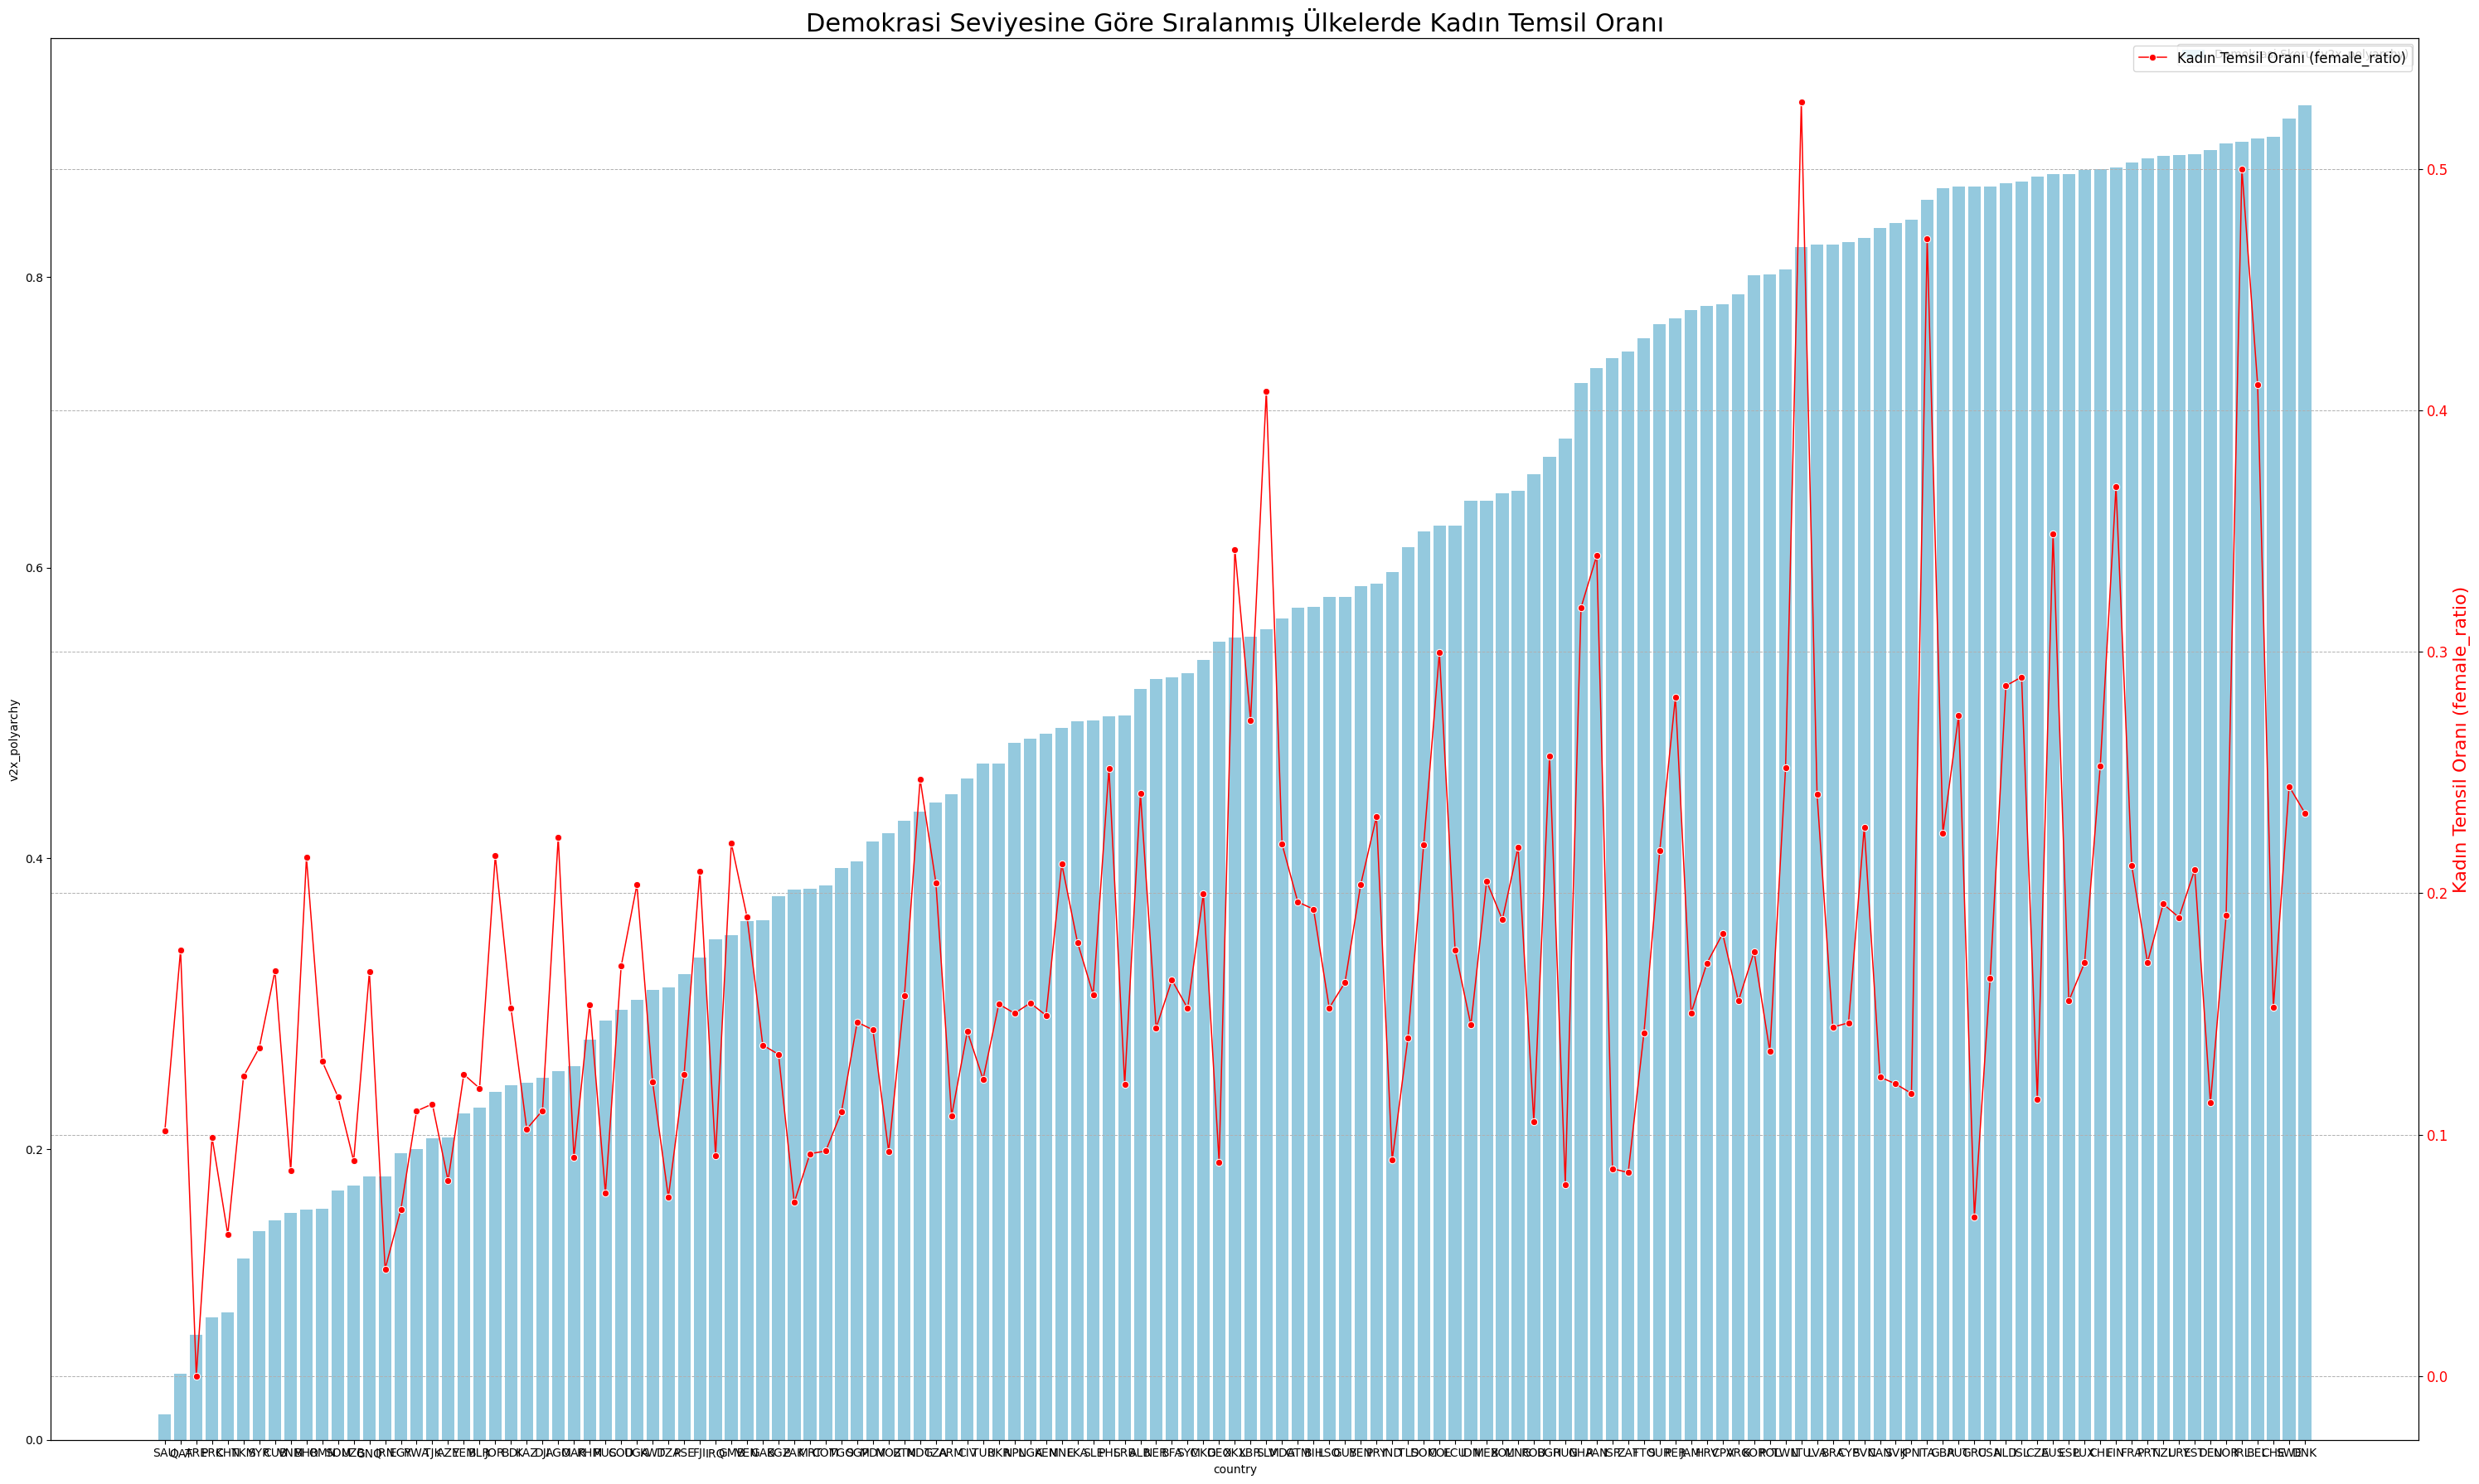

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# --- 1. Veriyi Demokrasi Skoruna göre Sıralama ---
df_sorted = merged_cleaned.sort_values(by='v2x_polyarchy', ascending=True)

# --- 2. Görselleştirme ---
plt.figure(figsize=(30, 18))  # Daha geniş ve yüksek grafik → etiketler taşmasın

# Demokrasi Skoru Bar Plot
sns.barplot(
    x='country',
    y='v2x_polyarchy',
    data=df_sorted,
    color='skyblue',
    label='Demokrasi Skoru (v2x_polyarchy)'
)

# İkinci eksen: Kadın Temsil Oranı
ax2 = plt.twinx()
sns.lineplot(
    x='country',
    y='female_ratio',
    data=df_sorted,
    ax=ax2,
    color='red',
    marker='o',
    linewidth=1.1,
    markersize=6,
    label='Kadın Temsil Oranı (female_ratio)'
)

# --- 3. Başlık ve Ekseler ---
plt.title('Demokrasi Seviyesine Göre Sıralanmış Ülkelerde Kadın Temsil Oranı', fontsize=22)
plt.xlabel('Ülkeler (Demokrasi Skoruna Göre Artan)', fontsize=18)

plt.ylabel('Demokrasi Skoru (v2x_polyarchy)', color='skyblue', fontsize=16)
plt.yticks(color='skyblue', fontsize=12)

ax2.set_ylabel('Kadın Temsil Oranı (female_ratio)', color='red', fontsize=16)
ax2.tick_params(axis='y', labelcolor='red')

# --- 🔥 X ekseni — 60 derece döndürme + daha büyük font ---
plt.xticks(rotation=60, ha='right', fontsize=10)

# Legend
plt.legend(loc='upper left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)

plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Bağımsız Değişken (X) ve Bağımlı Değişken (Y) tanımlama
X = merged_cleaned['v2x_polyarchy']
Y = merged_cleaned['female_ratio']

# Statsmodels için sabiti (intercept) modele ekleme
X = sm.add_constant(X)

# OLS (En Küçük Kareler) modelini kurma ve eğitme
model = sm.OLS(Y, X).fit()

# Model Özetini Görüntüleme (Tüm p-değerleri ve katsayılar buradadır)
print("\n--- Doğrusal Regresyon Model Özeti ---")
print(model.summary())

# --- Modelden Sonuçları Çıkarma ve Yorumlama ---
beta_1 = model.params['v2x_polyarchy']
p_value_two_tailed = model.pvalues['v2x_polyarchy']
alpha = 0.05

print(f"\n--- Yorumlama ---")
print(f"Demokrasi Katsayısı (β₁): {beta_1:.4f}")

# H1: β₁ > 0 (Pozitif ilişki) olduğu için Tek Kuyruklu Test
if beta_1 > 0:
    p_value_one_tailed = p_value_two_tailed / 2
    if p_value_one_tailed < alpha:
        print(f"Tek Kuyruklu P-Değeri: {p_value_one_tailed:.5f}")
        print("✅ SONUÇ: H0 Reddedilir.")
        print("Katsayı pozitif ve istatistiksel olarak anlamlıdır. Hipotez (H1) DESTEKLENMEKTEDİR.")
    else:
        print(f"Tek Kuyruklu P-Değeri: {p_value_one_tailed:.5f}")
        print("❌ SONUÇ: H0 Reddedilemez.")
        print("Pozitif ilişki istatistiksel olarak anlamlı değildir.")
else:
    print("❌ SONUÇ: H0 Reddedilemez.")
    print("Katsayı beklenen yönün (pozitif) tersidir veya anlamlı değildir.")


--- Doğrusal Regresyon Model Özeti ---
                            OLS Regression Results                            
Dep. Variable:           female_ratio   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     36.58
Date:                Sat, 29 Nov 2025   Prob (F-statistic):           1.36e-08
Time:                        11:27:56   Log-Likelihood:                 156.16
No. Observations:                 137   AIC:                            -308.3
Df Residuals:                     135   BIC:                            -302.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const 

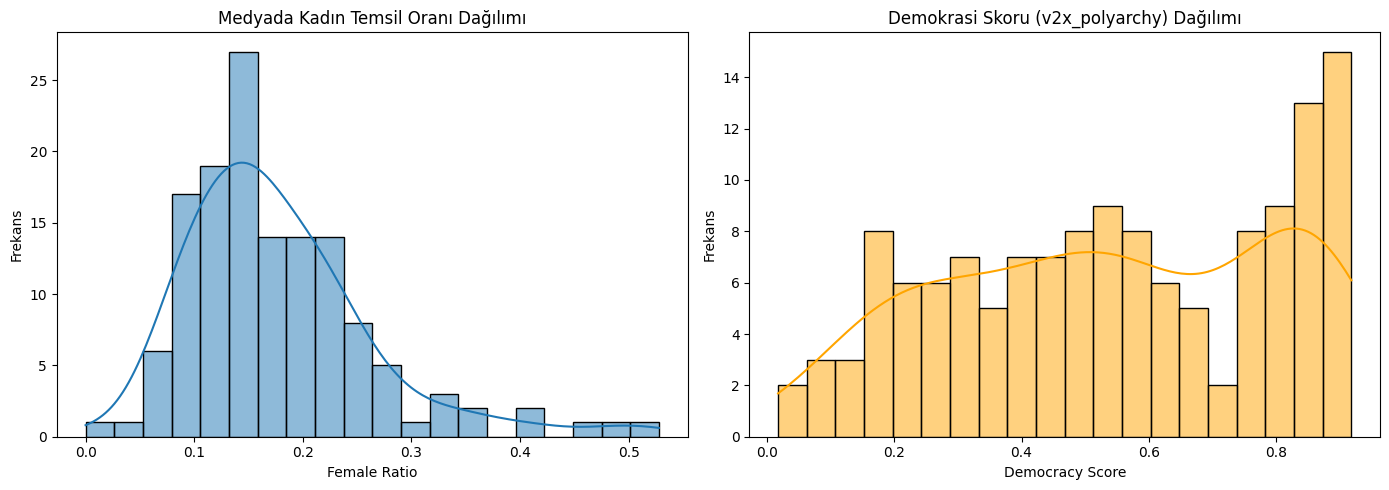

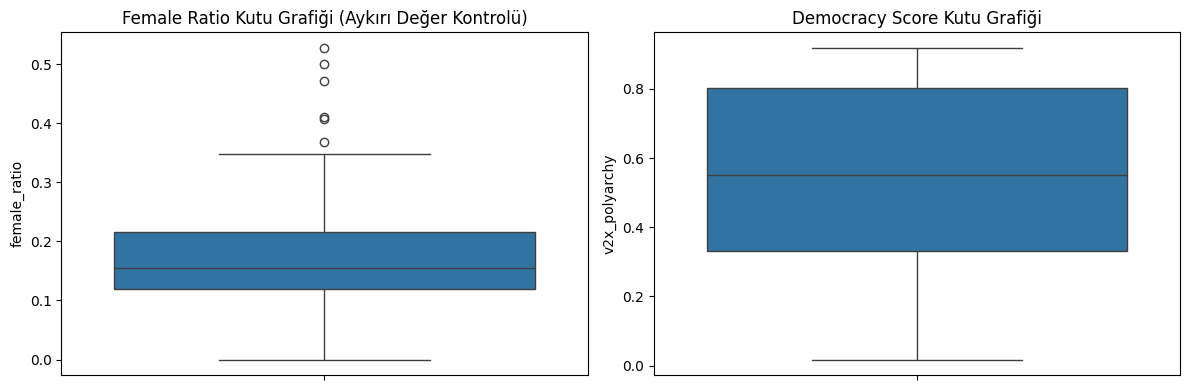

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Adım 1: Her Değişkenin Dağılımını Görme ---
plt.figure(figsize=(14, 5))

# Kadın Oranı (female_ratio) Dağılımı
plt.subplot(1, 2, 1)
sns.histplot(merged_cleaned["female_ratio"], kde=True, bins=20)
plt.title('Medyada Kadın Temsil Oranı Dağılımı')
plt.xlabel('Female Ratio')
plt.ylabel('Frekans')

# Demokrasi Skoru (v2x_polyarchy) Dağılımı
plt.subplot(1, 2, 2)
sns.histplot(merged_cleaned["v2x_polyarchy"], kde=True, bins=20, color='orange')
plt.title('Demokrasi Skoru (v2x_polyarchy) Dağılımı')
plt.xlabel('Democracy Score')
plt.ylabel('Frekans')

plt.tight_layout()
plt.show()

# --- Adım 2: Aykırı Değerlerin Kontrolü (Kutu Grafiği) ---
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(y=merged_cleaned["female_ratio"])
plt.title('Female Ratio Kutu Grafiği (Aykırı Değer Kontrolü)')

plt.subplot(1, 2, 2)
sns.boxplot(y=merged_cleaned["v2x_polyarchy"])
plt.title('Democracy Score Kutu Grafiği')

plt.tight_layout()
plt.show()